In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("BankChurners.csv")

In [6]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Drop Attrition_flag column 

In [8]:
df.drop(['Attrition_Flag'],axis=1,inplace=True)

In [9]:
df_ohe = pd.get_dummies(df)

In [10]:
df_ohe.shape

(10127, 37)

# Standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
X_ohe_std = StandardScaler().fit_transform(df_ohe)

# Apply PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
# object of pcs
pca = PCA(random_state=7)

In [16]:
pca.fit(X_ohe_std)

PCA(random_state=7)

In [17]:
trans_data = pca.transform(X_ohe_std)

In [18]:
type(trans_data)

numpy.ndarray

In [20]:
df_trans = pd.DataFrame(trans_data) #, index=X_ohe_std.index)

In [21]:
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.499179,-2.381809,-1.206188,-0.896605,1.532537,0.745319,2.989269,1.567728,0.589484,3.465206,...,0.004412,-0.388781,-0.127122,-0.004202,8.760354e-17,-3.608225e-16,-4.683753e-16,-1.387779e-16,7.077672e-16,-5.950102e-16
1,-1.363516,0.652538,-1.519134,-1.460651,0.906348,3.581272,4.943736,8.011494,-0.185840,4.069410,...,0.758259,-0.107259,-0.518094,0.583235,-2.521421e-15,1.249001e-15,-1.883910e-15,-5.828671e-16,1.075529e-15,-6.366435e-16
2,0.943141,-2.251733,-2.375227,-2.286540,2.498943,1.357723,4.412302,7.613436,0.401673,3.873443,...,-0.194322,0.642761,-0.293466,0.481017,-1.577731e-15,1.637579e-15,-6.349088e-16,1.137979e-15,8.257284e-16,-3.989864e-17
3,-2.504815,0.208400,-2.349401,-1.385722,1.728369,3.194159,3.827787,2.319379,-0.817034,1.243960,...,0.419959,-0.118575,-0.312310,0.732271,-2.188354e-15,3.608225e-16,-1.661865e-15,4.718448e-16,5.481726e-16,3.070461e-16
4,0.841201,-2.136735,-3.821835,-0.558848,2.910290,1.343300,5.605490,5.199045,0.719516,4.802453,...,-0.293968,0.777825,0.033271,0.208344,-1.577731e-15,-8.326673e-17,-4.683753e-16,5.828671e-16,1.873501e-15,-2.896988e-16


In [23]:
pca.n_components_

37

In [44]:
pca.components_[1] # coefficients of every column

array([-7.57547936e-02,  3.77317629e-02, -7.13462802e-02, -2.00141559e-01,
       -2.65776928e-02, -9.09043204e-02,  1.18464782e-01,  1.01243026e-03,
        1.18349144e-01, -2.63333726e-03,  3.69927928e-01,  3.80571686e-01,
        4.42536169e-02, -3.48746106e-02,  3.21657031e-01, -3.21657031e-01,
       -3.32977728e-04,  3.62692743e-03,  1.06117409e-02, -2.46190879e-02,
       -1.09580505e-03,  1.05707065e-02,  2.16573380e-03,  2.48339495e-02,
       -1.73894560e-01,  1.47815262e-01,  3.10883855e-02, -6.21837568e-02,
       -2.63133355e-02, -1.75592334e-01, -1.52178205e-01,  2.09009672e-01,
        1.32759624e-01, -3.51388343e-01,  1.50064105e-01,  7.97260734e-02,
        3.03576452e-01])

# How many components to select?

In [26]:
pca.explained_variance_ratio_ * 100

array([1.18452941e+01, 6.89364155e+00, 5.26379557e+00, 4.84539766e+00,
       4.71339843e+00, 4.09656251e+00, 3.75777386e+00, 3.64126197e+00,
       3.51344821e+00, 3.39328005e+00, 3.31233935e+00, 3.23119471e+00,
       3.19311072e+00, 3.10777807e+00, 3.04084005e+00, 2.97875223e+00,
       2.89543214e+00, 2.89339101e+00, 2.80172766e+00, 2.72080343e+00,
       2.71352966e+00, 2.64417986e+00, 2.63277421e+00, 2.43804681e+00,
       2.15558747e+00, 1.61593825e+00, 1.45645212e+00, 6.46725224e-01,
       5.67393919e-01, 5.48981403e-01, 4.41167849e-01, 2.33607235e-30,
       7.52278692e-31, 4.61164809e-31, 1.53569316e-31, 6.35298958e-32,
       5.24598510e-33])

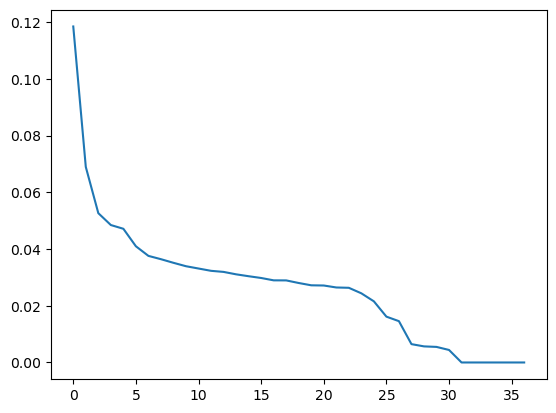

In [27]:
import matplotlib.pyplot as plt
plt.plot(list(range(df_ohe.shape[1])), pca.explained_variance_ratio_)

# Automated way of selecting number of components

In [36]:
pca1 = PCA(n_components = 0.95, random_state=7 )

In [40]:
pca1.fit(X_ohe_std)

PCA(n_components=0.95, random_state=7)

In [41]:
trans_data = pca1.transform(X_ohe_std)

In [42]:
trans_data.shape

(10127, 26)